## Load packages

In [19]:
import csv
import pandas as pd
import numpy as np
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load turkish-se-SP500vsMSCI.csv dataset

In [20]:
# Linear regression model without intercept is regression model just with a starting point at (0,,0)
turkishStock = pd.read_csv("../src/turkish-se-SP500vsMSCI.csv", sep=',', names=['x1', 'x2'])
turkishStock[:5]

,x1,x2
0,-0.004679,0.012698
1,0.007787,0.011341
2,-0.030469,-0.017073
3,0.003391,-0.005561
4,-0.021533,-0.010989


## Load mtcarsdata-4features.csv.csv dataset

In [21]:
# lubu dubu

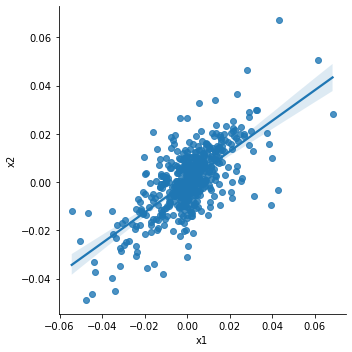

In [22]:
sns.lmplot(x='x1', y='x2', data=turkishStock, fit_reg=True)
plt.show()

## Linear Regression without intercept (probabably)- standarized data

In [23]:
turkishStock_standarized = (turkishStock-turkishStock.mean())/turkishStock.std()
turkishStock_standarized[:5]

,x1,x2
0,-0.377679,0.941296
1,0.506880,0.836802
2,-2.207658,-1.350527
3,0.194996,-0.464321
4,-1.573588,-0.882155


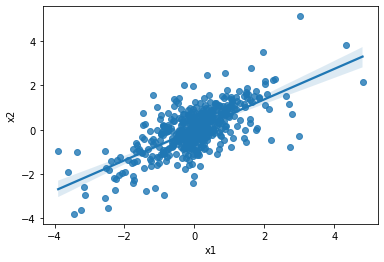

In [24]:
sns.regplot(data=turkishStock_std, x='x1', y='x2')
plt.show()

turkishStock_standarized 1072
dataSampleTurkish 108


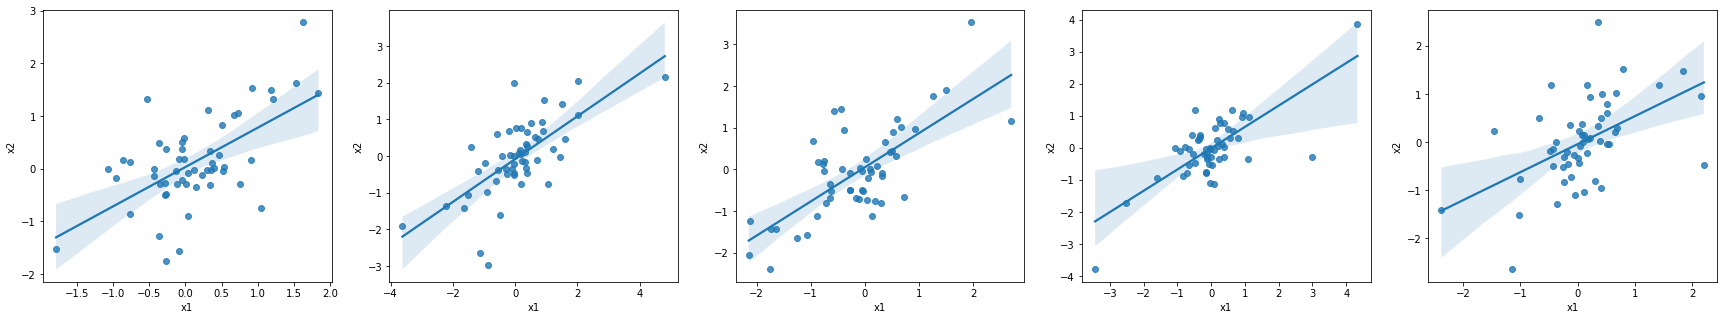

In [37]:
dataSampleTurkish = turkishStock_standarized.sample(frac=0.1)
print("turkishStock_standarized",turkishStock_standarized.size)
print("dataSampleTurkish",dataSampleTurkish.size)


# plt.show()
fig, axes = plt.subplots(1, 5, figsize=(30, 5))
# fig, axes = plt.subplots(1, 5, figsize=(15, 15), sharey=True)


for i in range (5):
    dataSampleTurkish = turkishStock_standarized.sample(frac=0.1)
    sns.regplot(ax= axes[i], data=dataSampleTurkish, x='x1', y='x2')
plt.show()
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8